In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('default of credit card clients.xls', header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Attribute Information:

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# Data Cleanning

In [8]:
df = df.rename(columns={"default payment next month" : "default"})

In [9]:
df.rename(columns={"PAY_0" : "Repayment_of_Sept","PAY_2" : "Repayment_of_Aug","PAY_3" : "Repayment_of_July","PAY_4" : "Repayment_of_June","PAY_5" : "Repayment_of_May","PAY_6" : "Repayment_of_Apr"},inplace=True)
#  The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months

In [10]:
df.rename(columns={"PAY_AMT1" : "amt_paid_in_Sept","PAY_AMT2" : "amt_paid_in_Aug","PAY_AMT3" : "amt_paid_in_July","PAY_AMT4" : "amt_paid_in_June","PAY_AMT5" : "amt_paid_in_May","PAY_AMT6" : "amt_paid_in_Apr"},inplace=True)
# Amount of bill statement (NT dollar)

In [11]:
df.rename(columns={"BILL_AMT1" : "bill_amt_in_Sept","BILL_AMT2" : "bill_amt_in_Aug","BILL_AMT3" : "bill_amt_in_July","BILL_AMT4" : "bill_amt_in_June","BILL_AMT5" : "bill_amt_in_May","BILL_AMT6" : "bill_amt_in_Apr"},inplace=True)
# Amount of previous payment (NT dollar)

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment_of_Sept', 'Repayment_of_Aug', 'Repayment_of_July',
       'Repayment_of_June', 'Repayment_of_May', 'Repayment_of_Apr',
       'bill_amt_in_Sept', 'bill_amt_in_Aug', 'bill_amt_in_July',
       'bill_amt_in_June', 'bill_amt_in_May', 'bill_amt_in_Apr',
       'amt_paid_in_Sept', 'amt_paid_in_Aug', 'amt_paid_in_July',
       'amt_paid_in_June', 'amt_paid_in_May', 'amt_paid_in_Apr', 'default'],
      dtype='object')

In [13]:
# % of defaulters
df['default'].value_counts(normalize=True)
# default is client's behavior; 
# default = 0 then not default, 
# default = 1 then default.

0    0.7788
1    0.2212
Name: default, dtype: float64

In [14]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
Repayment_of_Sept    0
Repayment_of_Aug     0
Repayment_of_July    0
Repayment_of_June    0
Repayment_of_May     0
Repayment_of_Apr     0
bill_amt_in_Sept     0
bill_amt_in_Aug      0
bill_amt_in_July     0
bill_amt_in_June     0
bill_amt_in_May      0
bill_amt_in_Apr      0
amt_paid_in_Sept     0
amt_paid_in_Aug      0
amt_paid_in_July     0
amt_paid_in_June     0
amt_paid_in_May      0
amt_paid_in_Apr      0
default              0
dtype: int64

In [15]:
# NO missing values

In [16]:
df.info()
#datatyes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 30000 non-null  int64
 1   LIMIT_BAL          30000 non-null  int64
 2   SEX                30000 non-null  int64
 3   EDUCATION          30000 non-null  int64
 4   MARRIAGE           30000 non-null  int64
 5   AGE                30000 non-null  int64
 6   Repayment_of_Sept  30000 non-null  int64
 7   Repayment_of_Aug   30000 non-null  int64
 8   Repayment_of_July  30000 non-null  int64
 9   Repayment_of_June  30000 non-null  int64
 10  Repayment_of_May   30000 non-null  int64
 11  Repayment_of_Apr   30000 non-null  int64
 12  bill_amt_in_Sept   30000 non-null  int64
 13  bill_amt_in_Aug    30000 non-null  int64
 14  bill_amt_in_July   30000 non-null  int64
 15  bill_amt_in_June   30000 non-null  int64
 16  bill_amt_in_May    30000 non-null  int64
 17  bill_amt_in_

In [17]:
# duplicate IDs
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


# statistic summary of the columns

In [18]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,bill_amt_in_Sept,bill_amt_in_Aug,bill_amt_in_July,bill_amt_in_June,bill_amt_in_May,bill_amt_in_Apr,amt_paid_in_Sept,amt_paid_in_Aug,amt_paid_in_July,amt_paid_in_June,amt_paid_in_May,amt_paid_in_Apr,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [20]:
df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [21]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [23]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [24]:
# Combine 0 and 3 by changing the value 0 into 3

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

In [25]:
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 
            3 : 'high school', 0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

# Visualization

### Gender

In [26]:
df['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

<AxesSubplot:ylabel='SEX'>

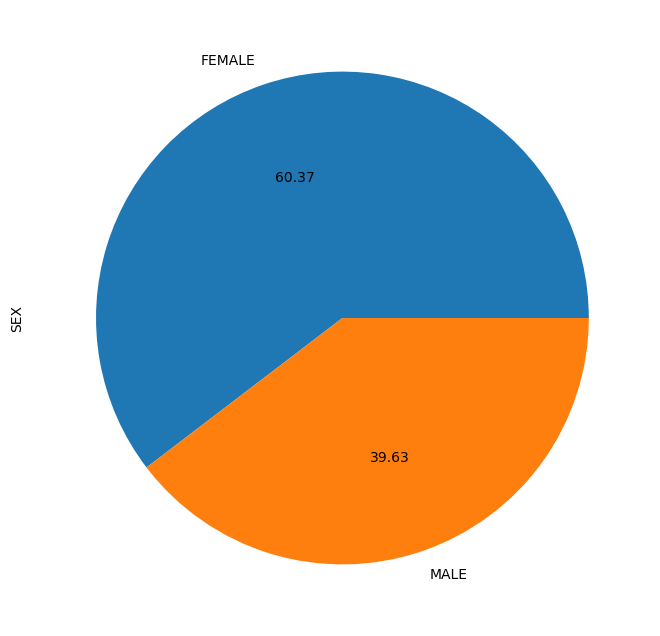

In [27]:
fig, axes = plt.subplots(figsize=(13,8))
df['SEX'].value_counts().plot.pie(autopct="%.2f")

<AxesSubplot:xlabel='SEX', ylabel='count'>

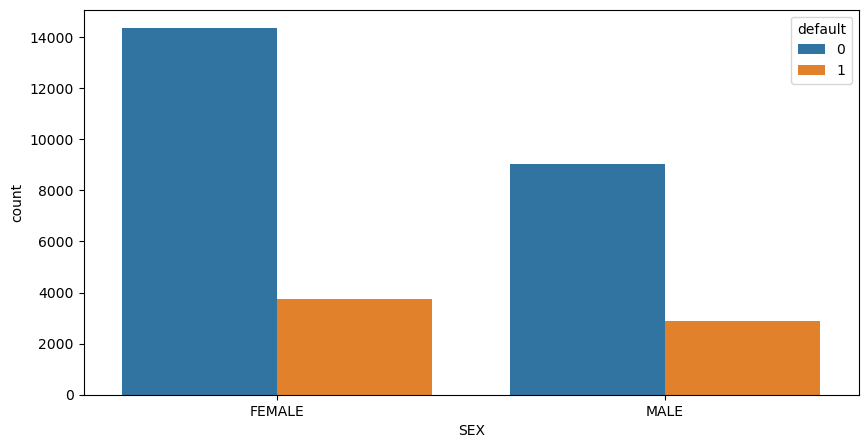

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', hue = 'default', data = df)

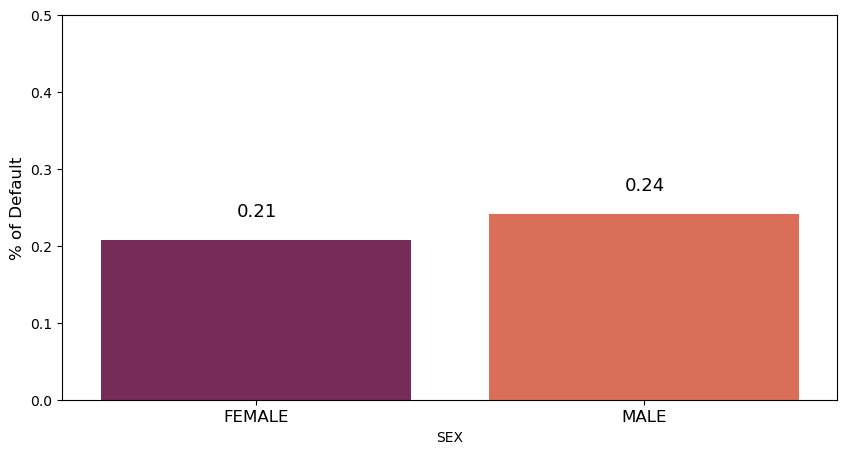

In [29]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "SEX", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['FEMALE', 'MALE'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

There are more women than men in our dataset, but men have a slightly higher chance of default, will add more paramter & check again

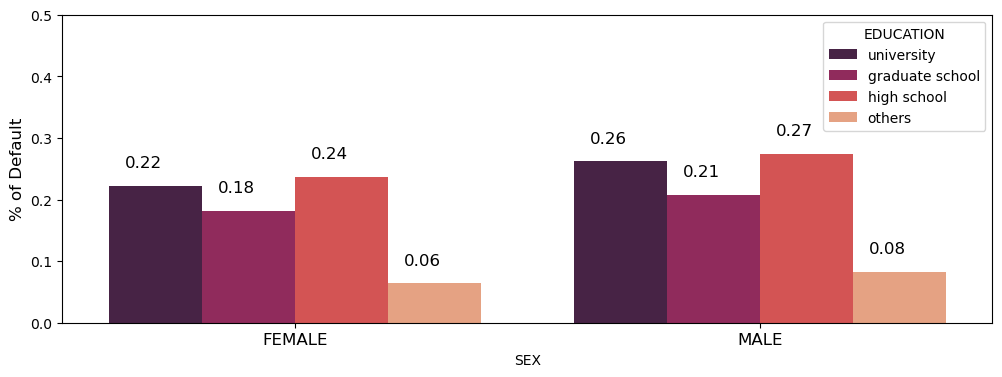

In [30]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['FEMALE', 'MALE'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

No. of defaulters have a higher proportion of Male.

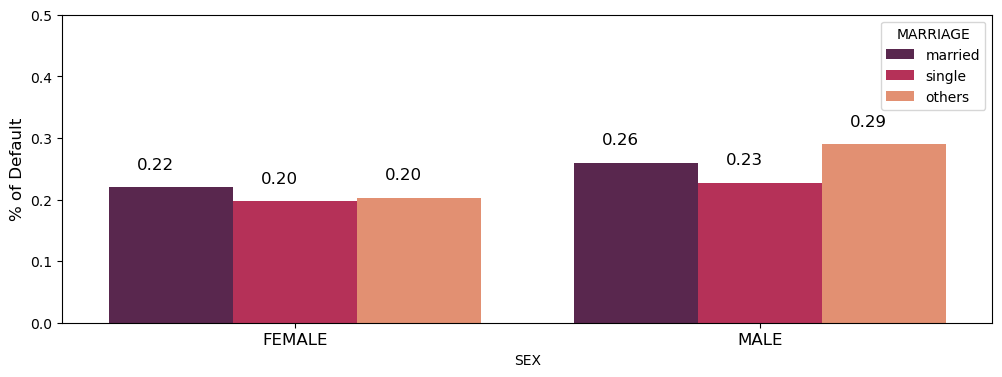

In [31]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "SEX", y = "default", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['FEMALE', 'MALE'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In this comparison also, the probability of default was higher for men.

### EDUCATION

<AxesSubplot:ylabel='EDUCATION'>

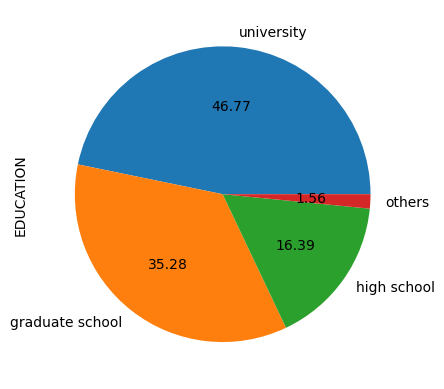

In [32]:
df['EDUCATION'].value_counts().plot.pie(autopct="%.2f")

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

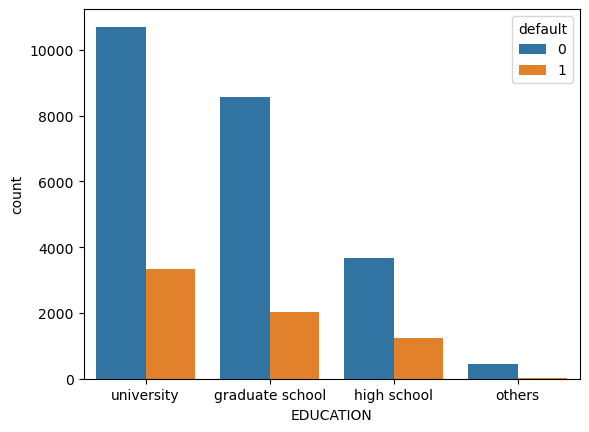

In [33]:
sns.countplot(x = 'EDUCATION', hue = 'default', data = df)

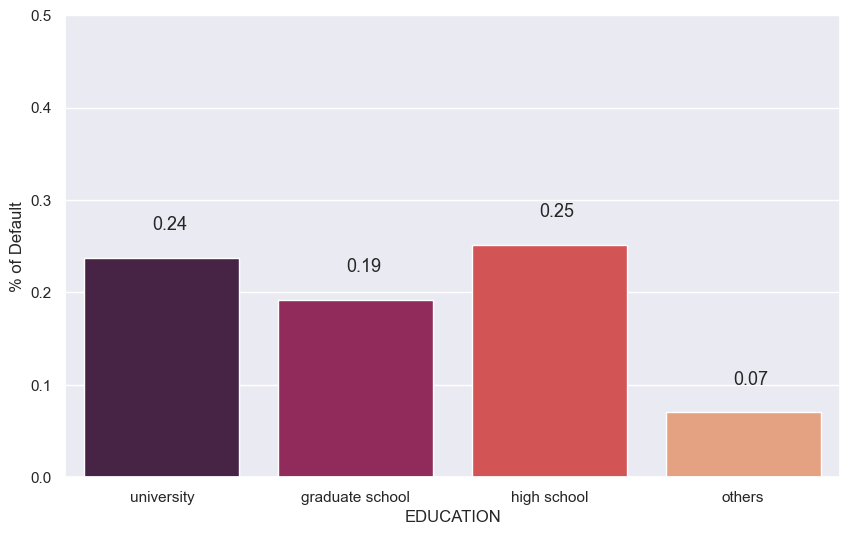

In [34]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x = "EDUCATION", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

### MARRIAGE

<AxesSubplot:ylabel='MARRIAGE'>

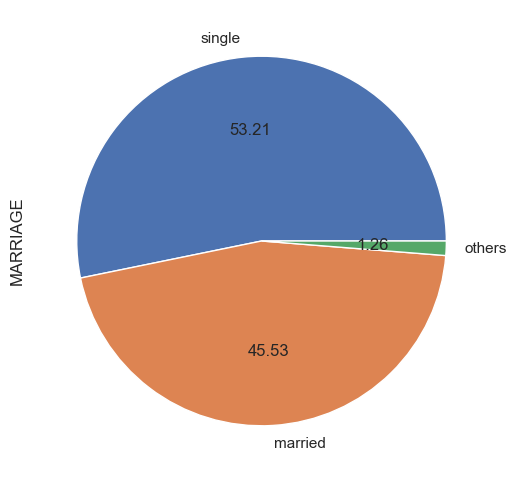

In [35]:
df['MARRIAGE'].value_counts().plot.pie(autopct="%.2f")

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

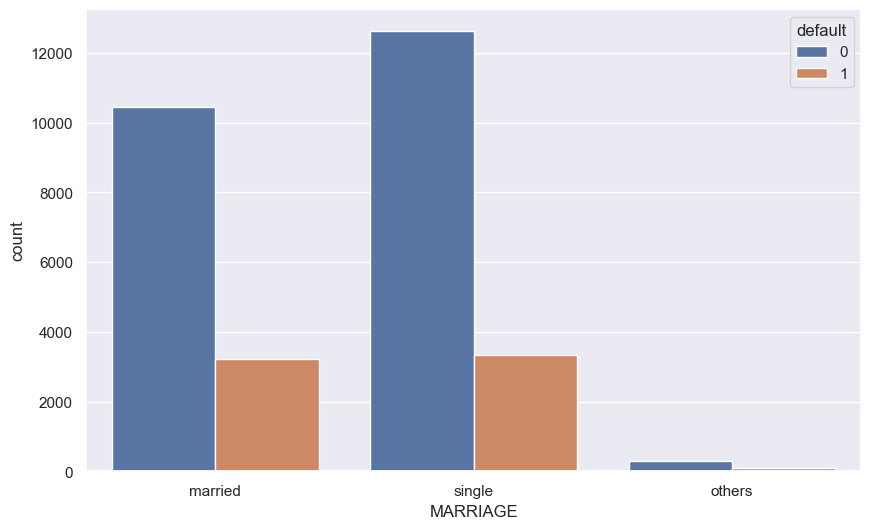

In [36]:
sns.countplot(x = 'MARRIAGE', hue = 'default', data = df)

In [37]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

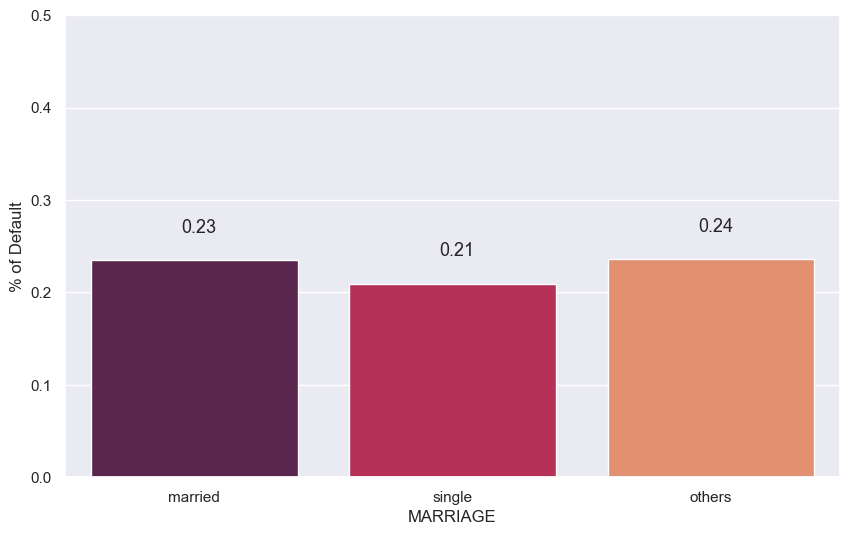

In [38]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
# plt.xticks([1,2,3],['married', 'single','others'], fontsize = 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

In [39]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,bill_amt_in_Sept,bill_amt_in_Aug,bill_amt_in_July,bill_amt_in_June,bill_amt_in_May,bill_amt_in_Apr,amt_paid_in_Sept,amt_paid_in_Aug,amt_paid_in_July,amt_paid_in_June,amt_paid_in_May,amt_paid_in_Apr,default
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Age

<AxesSubplot:xlabel='AGE', ylabel='count'>

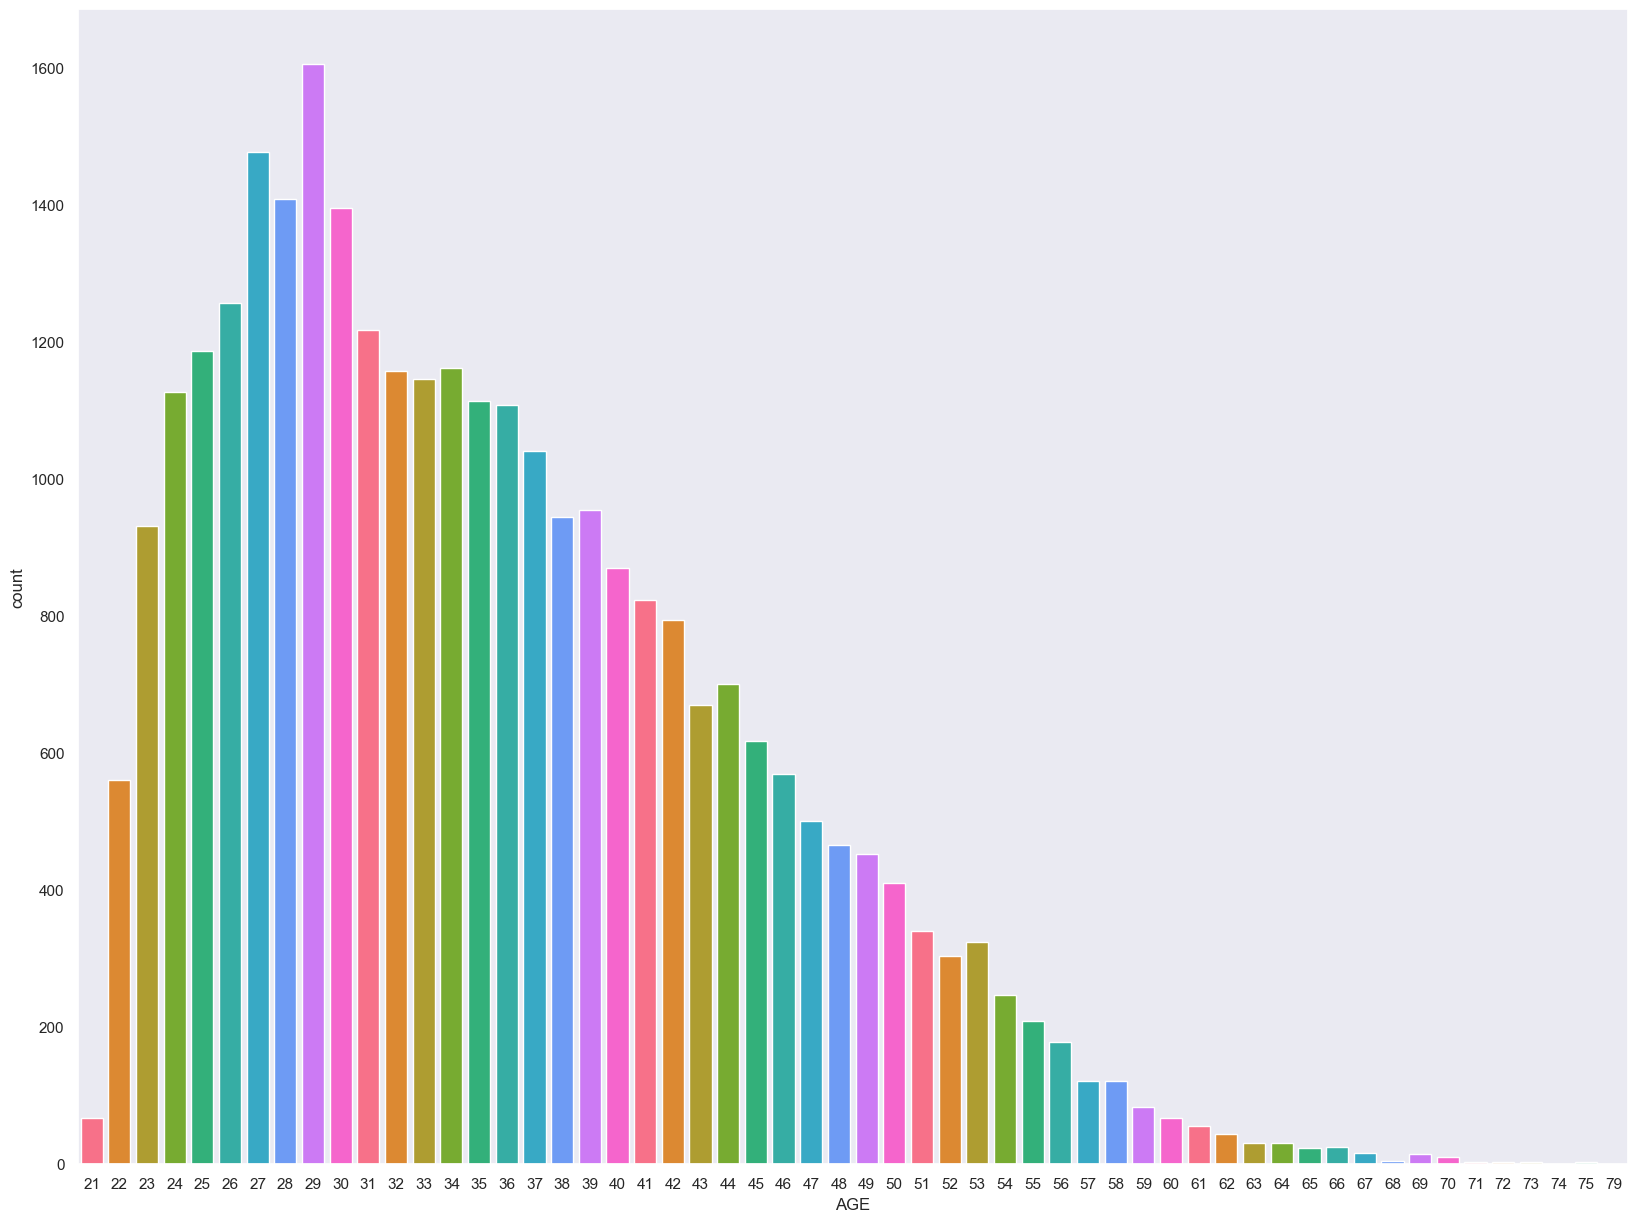

In [40]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("dark")
sns.countplot(x="AGE", data=df, palette=sns.color_palette("husl", 10), saturation=15)

In [41]:
# will create age_group column

<AxesSubplot:xlabel='AGE_GROUP', ylabel='count'>

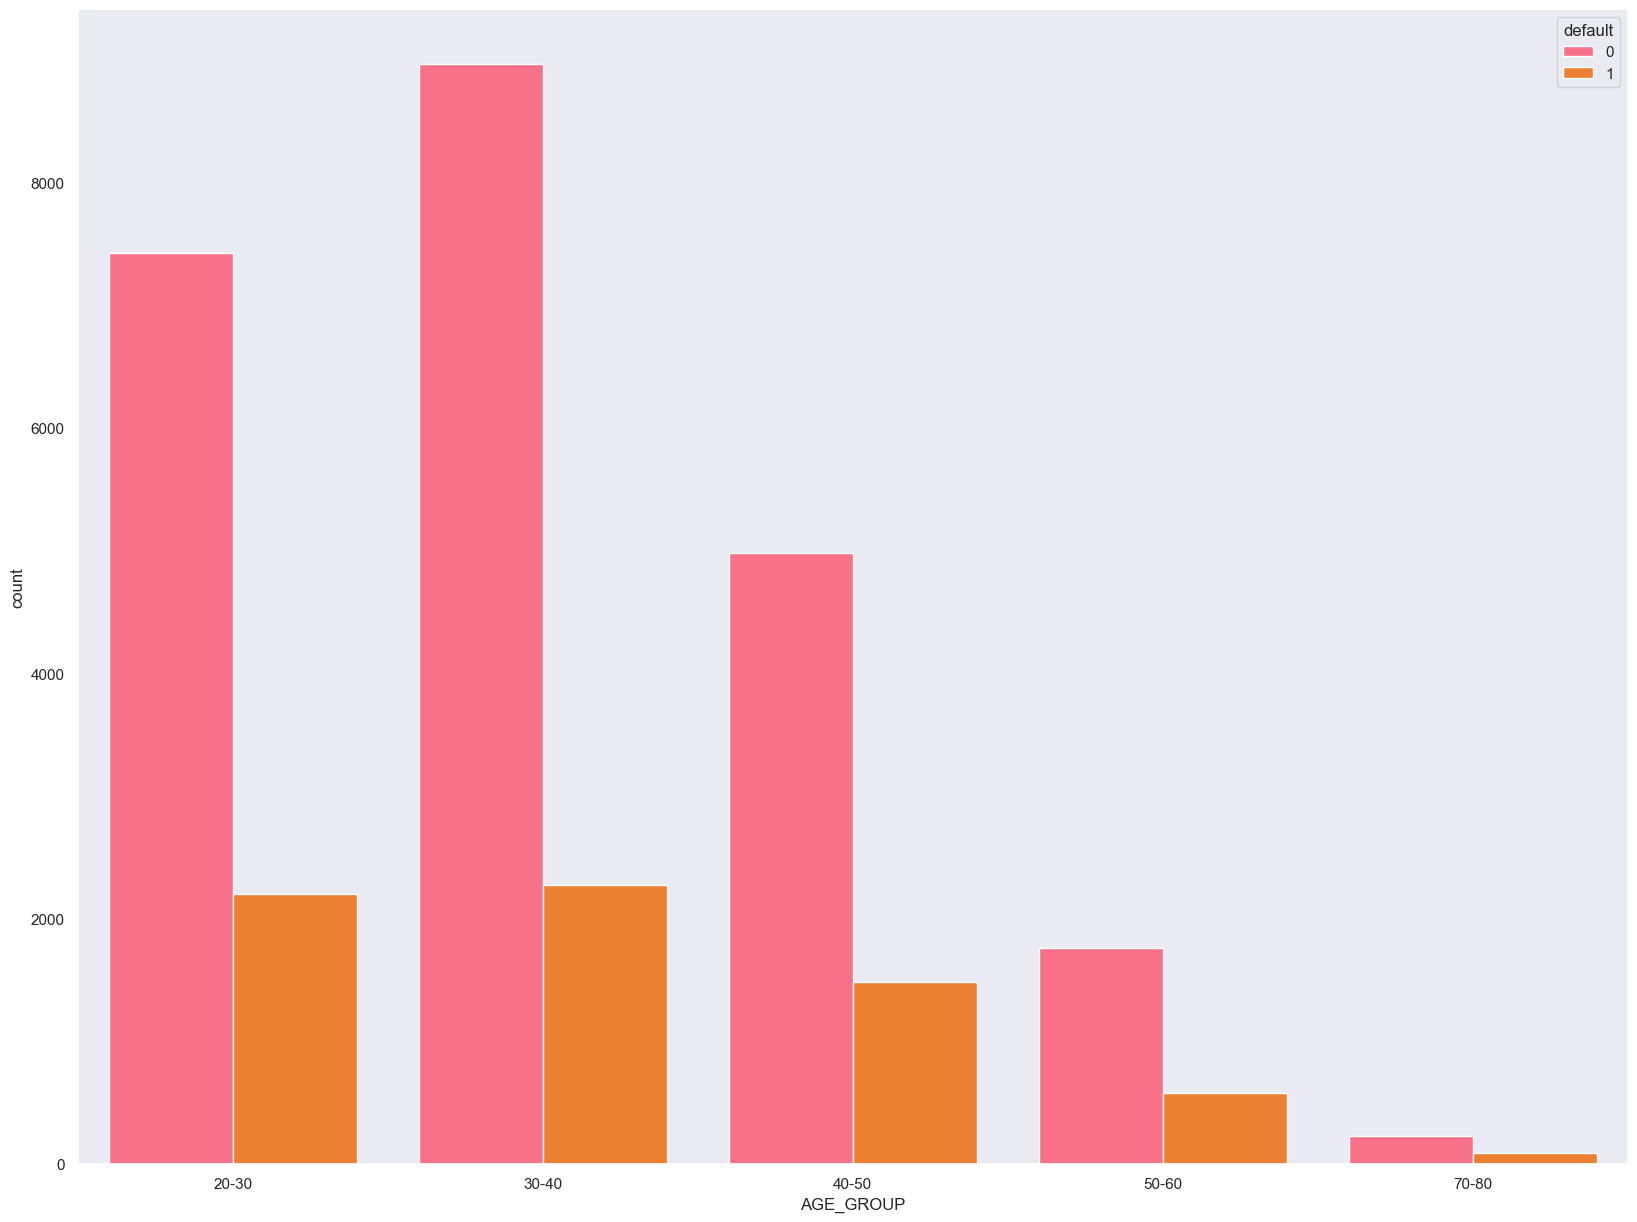

In [42]:
bins= [20,30,40,50,60,70]
labels = ['20-30','30-40','40-50','50-60','70-80']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
sns.countplot(x="AGE_GROUP", data=df, hue = 'default',palette=sns.color_palette("husl", 13), saturation=13)

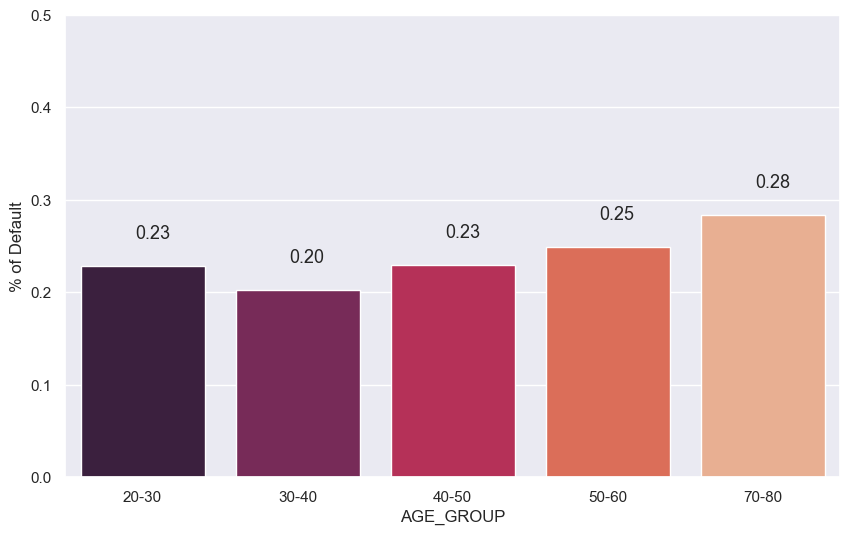

In [43]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x = "AGE_GROUP", y = "default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

lowest chances of default are registered around 30-40 years old, while the highest occur at the extremes (50+)

In [44]:
df['AGE_GROUP'].value_counts()

30-40    11238
20-30     9618
40-50     6464
50-60     2341
70-80      314
Name: AGE_GROUP, dtype: int64

In [45]:
df.drop('AGE_GROUP', axis =1, inplace=True)

### Limit Balance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


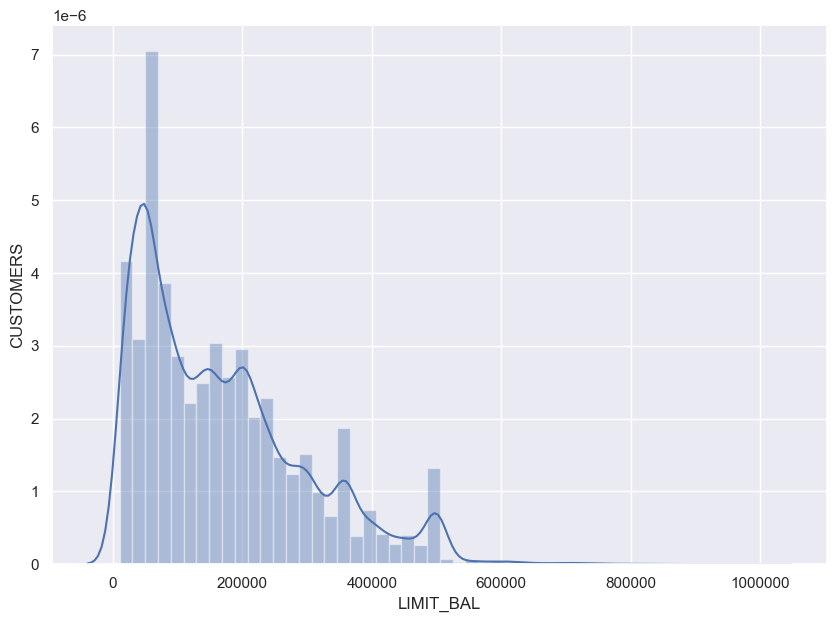

In [46]:
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('CUSTOMERS')
plt.show()

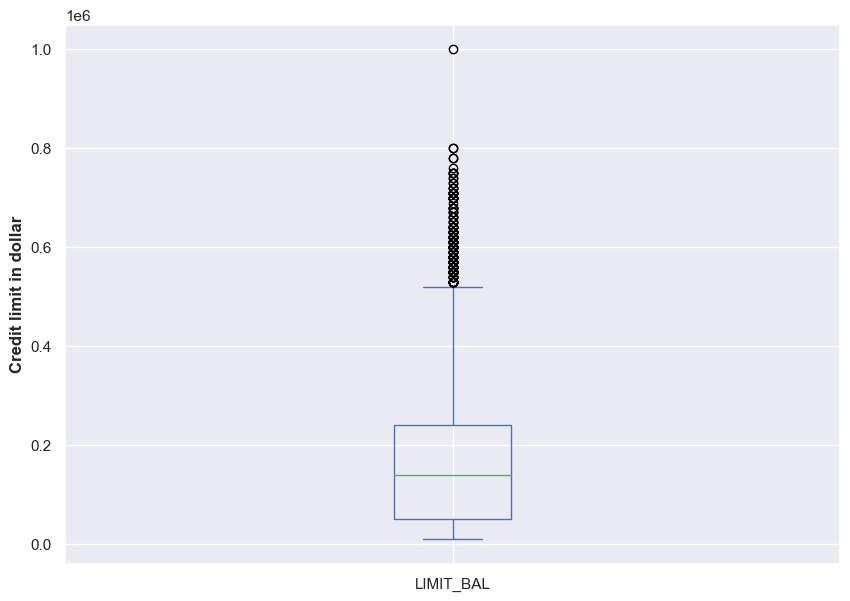

In [47]:
sns.set(rc={'figure.figsize':(10,7)})
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.ylabel('Credit limit in dollar', fontweight='bold')
plt.show()


In [48]:
# Extream outerlier
outliers = df.loc[df['LIMIT_BAL']>800000]
outliers


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,bill_amt_in_Sept,bill_amt_in_Aug,bill_amt_in_July,bill_amt_in_June,bill_amt_in_May,bill_amt_in_Apr,amt_paid_in_Sept,amt_paid_in_Aug,amt_paid_in_July,amt_paid_in_June,amt_paid_in_May,amt_paid_in_Apr,default
2197,2198,1000000,FEMALE,graduate school,married,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


If we observe the outlier
The observations from other columns indicate that this was just a customer who has an excellent payment history
Therefore it should be considered as a valid data

<AxesSubplot:xlabel='LIMIT_BAL_GROUP', ylabel='count'>

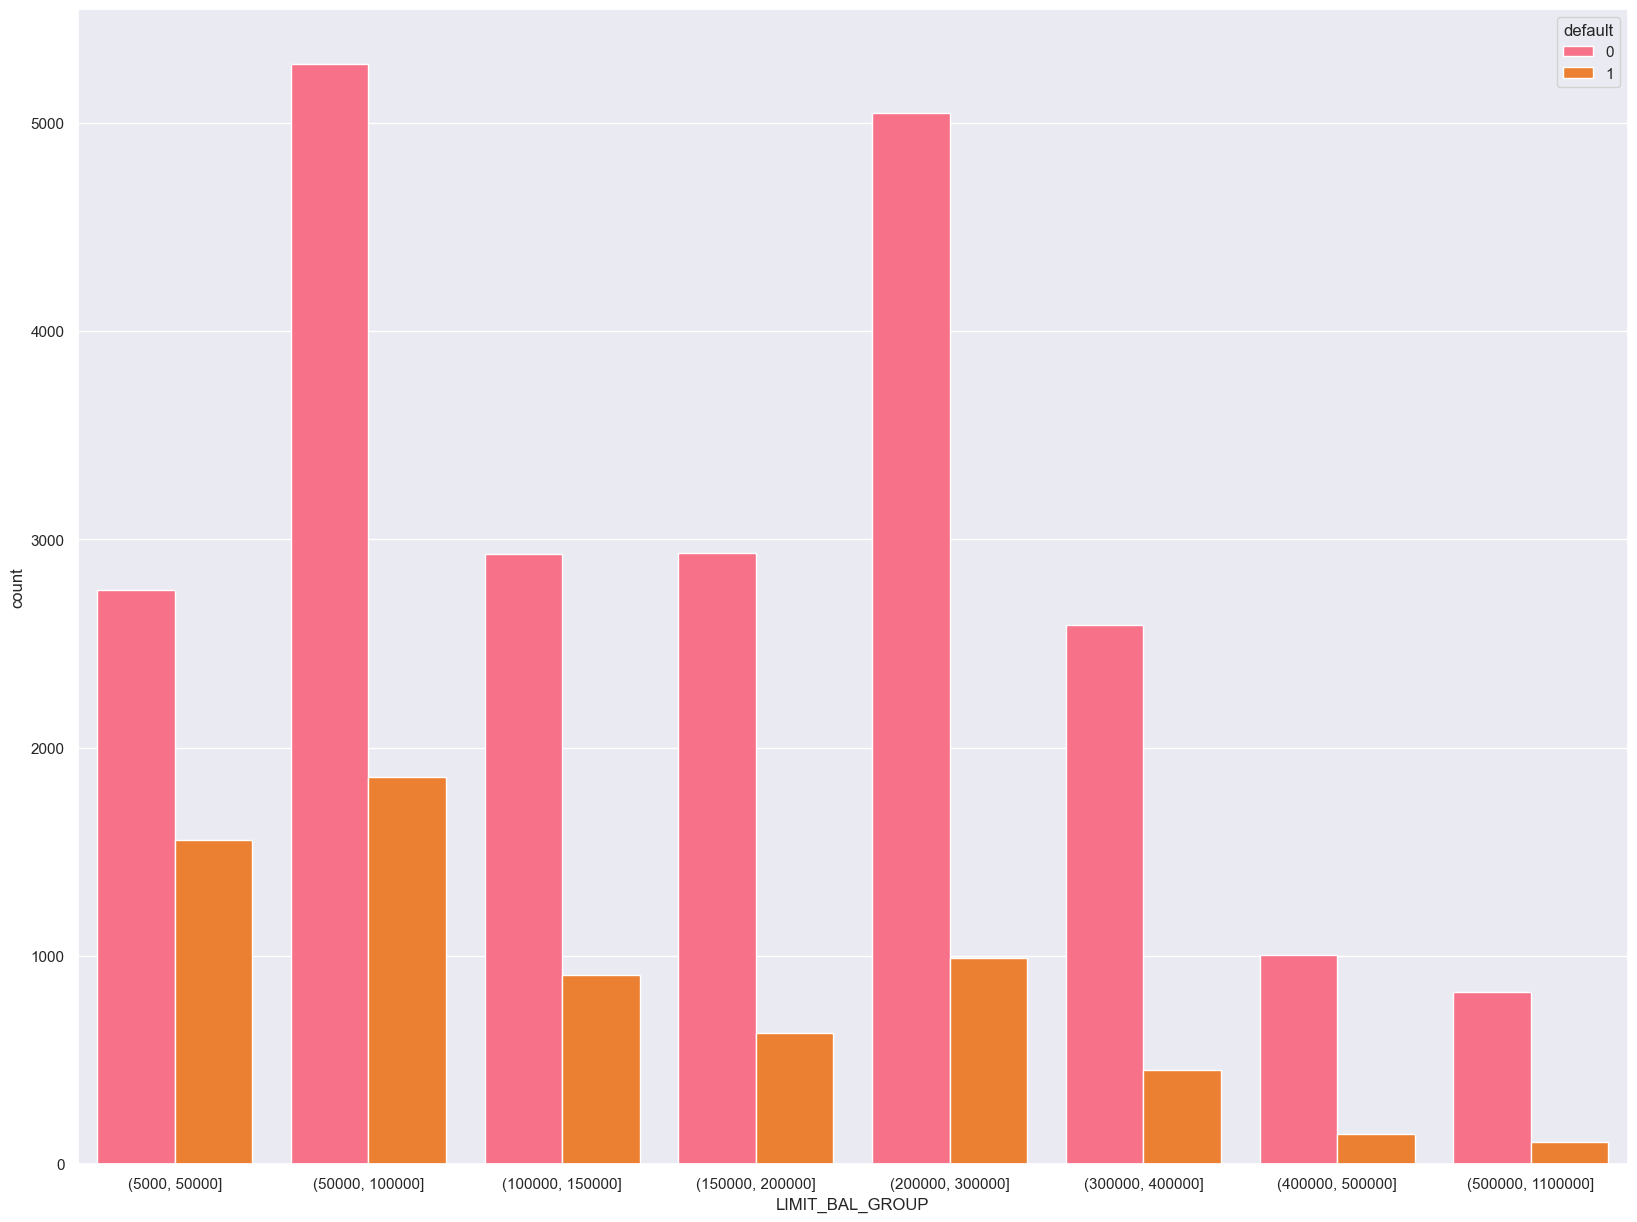

In [49]:
sns.set(rc={'figure.figsize':(20,15)})
bins= [5000,50000,100000,150000,200000,300000,400000,500000,1100000]
labels = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
df['LIMIT_BAL_GROUP'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels, right=False)
sns.countplot(x="LIMIT_BAL_GROUP", data=df, hue = 'default',palette=sns.color_palette("husl", 13), saturation=13)

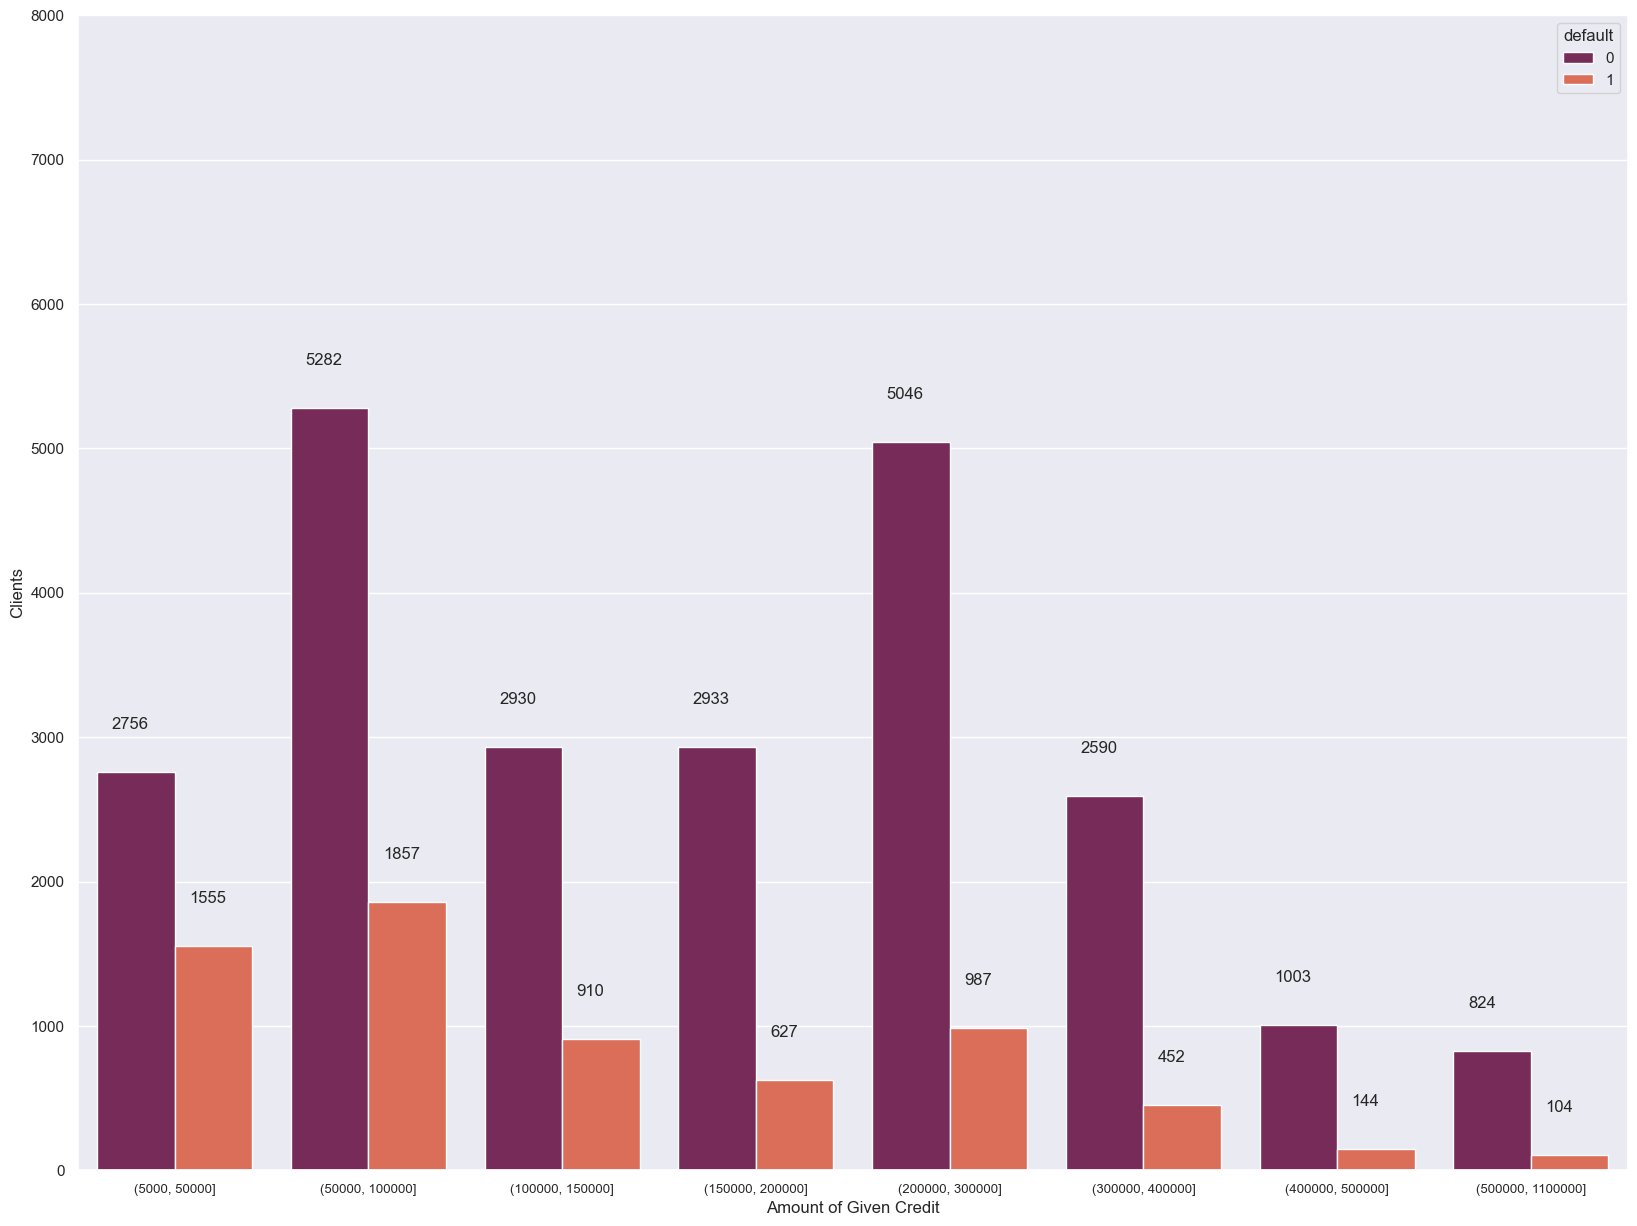

In [50]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.countplot(data = df, x = 'LIMIT_BAL_GROUP', hue="default", palette = 'rocket', order = labels)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

In [51]:
# We can see that the higher the limit, the lower is the chance of defaulting.

## Amount paid in month

In [52]:
pay_amtx_bins = ['amt_paid_in_Sept', 'amt_paid_in_Aug', 'amt_paid_in_July', 'amt_paid_in_June', 'amt_paid_in_May', 'amt_paid_in_Apr']
for i, col in enumerate (pay_amtx_bins):
    df[col] = pd.cut(df[pay_amtx_bins[i]],[-1, 0, 25000, 50000, 100000, 2000000])

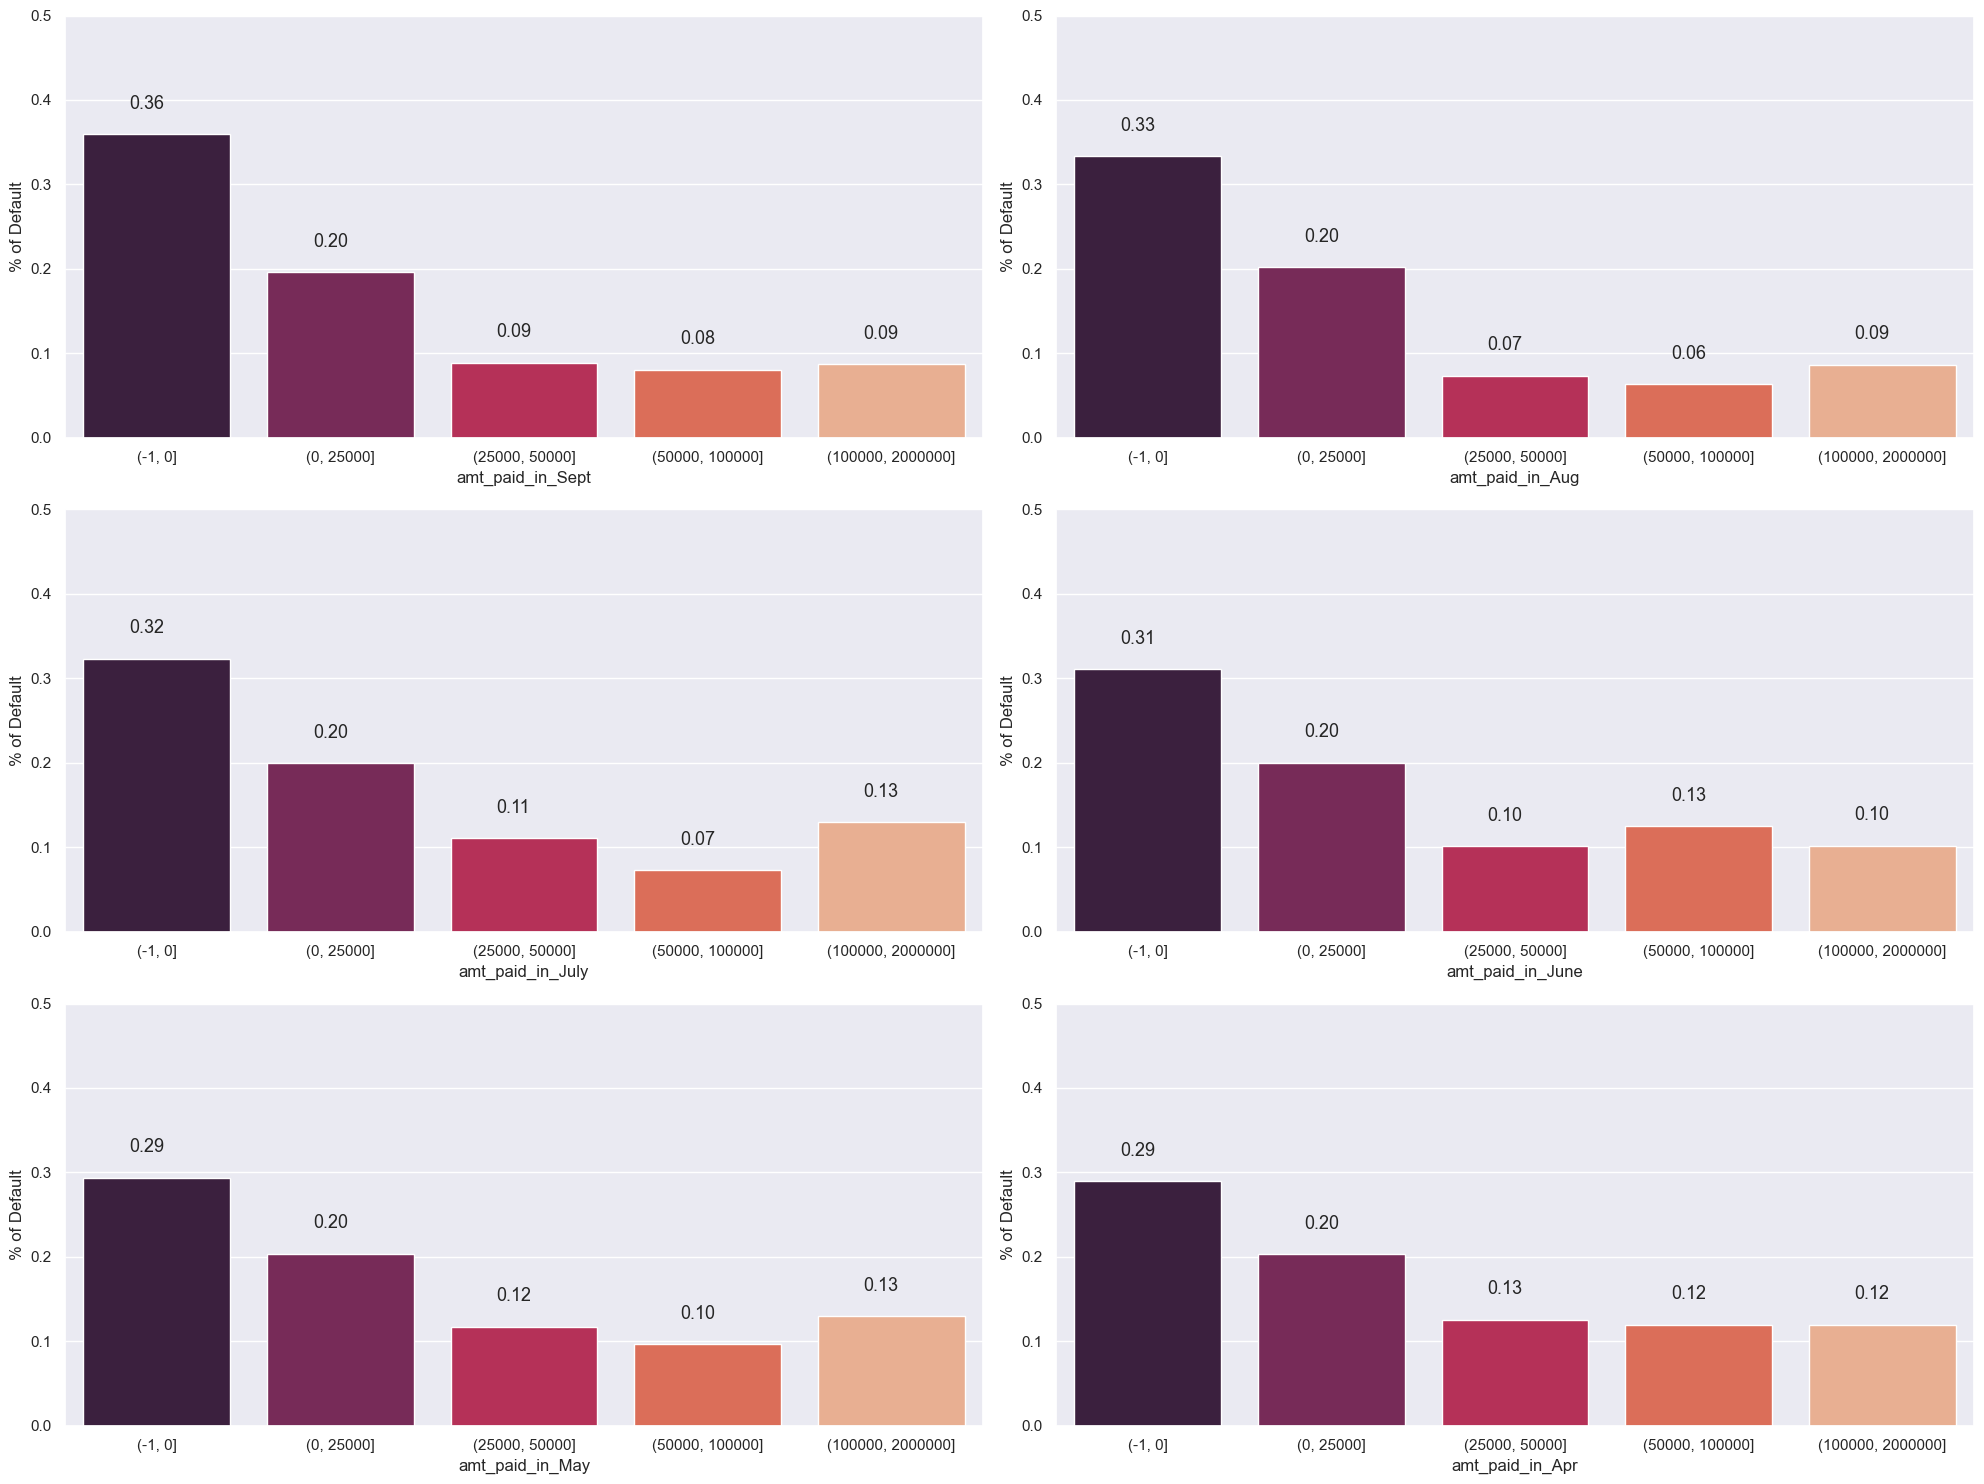

In [53]:
sns.set(rc={'figure.figsize':(20,15)})
for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [54]:
# There is a higher default rate among those who paid nothing in previous months 

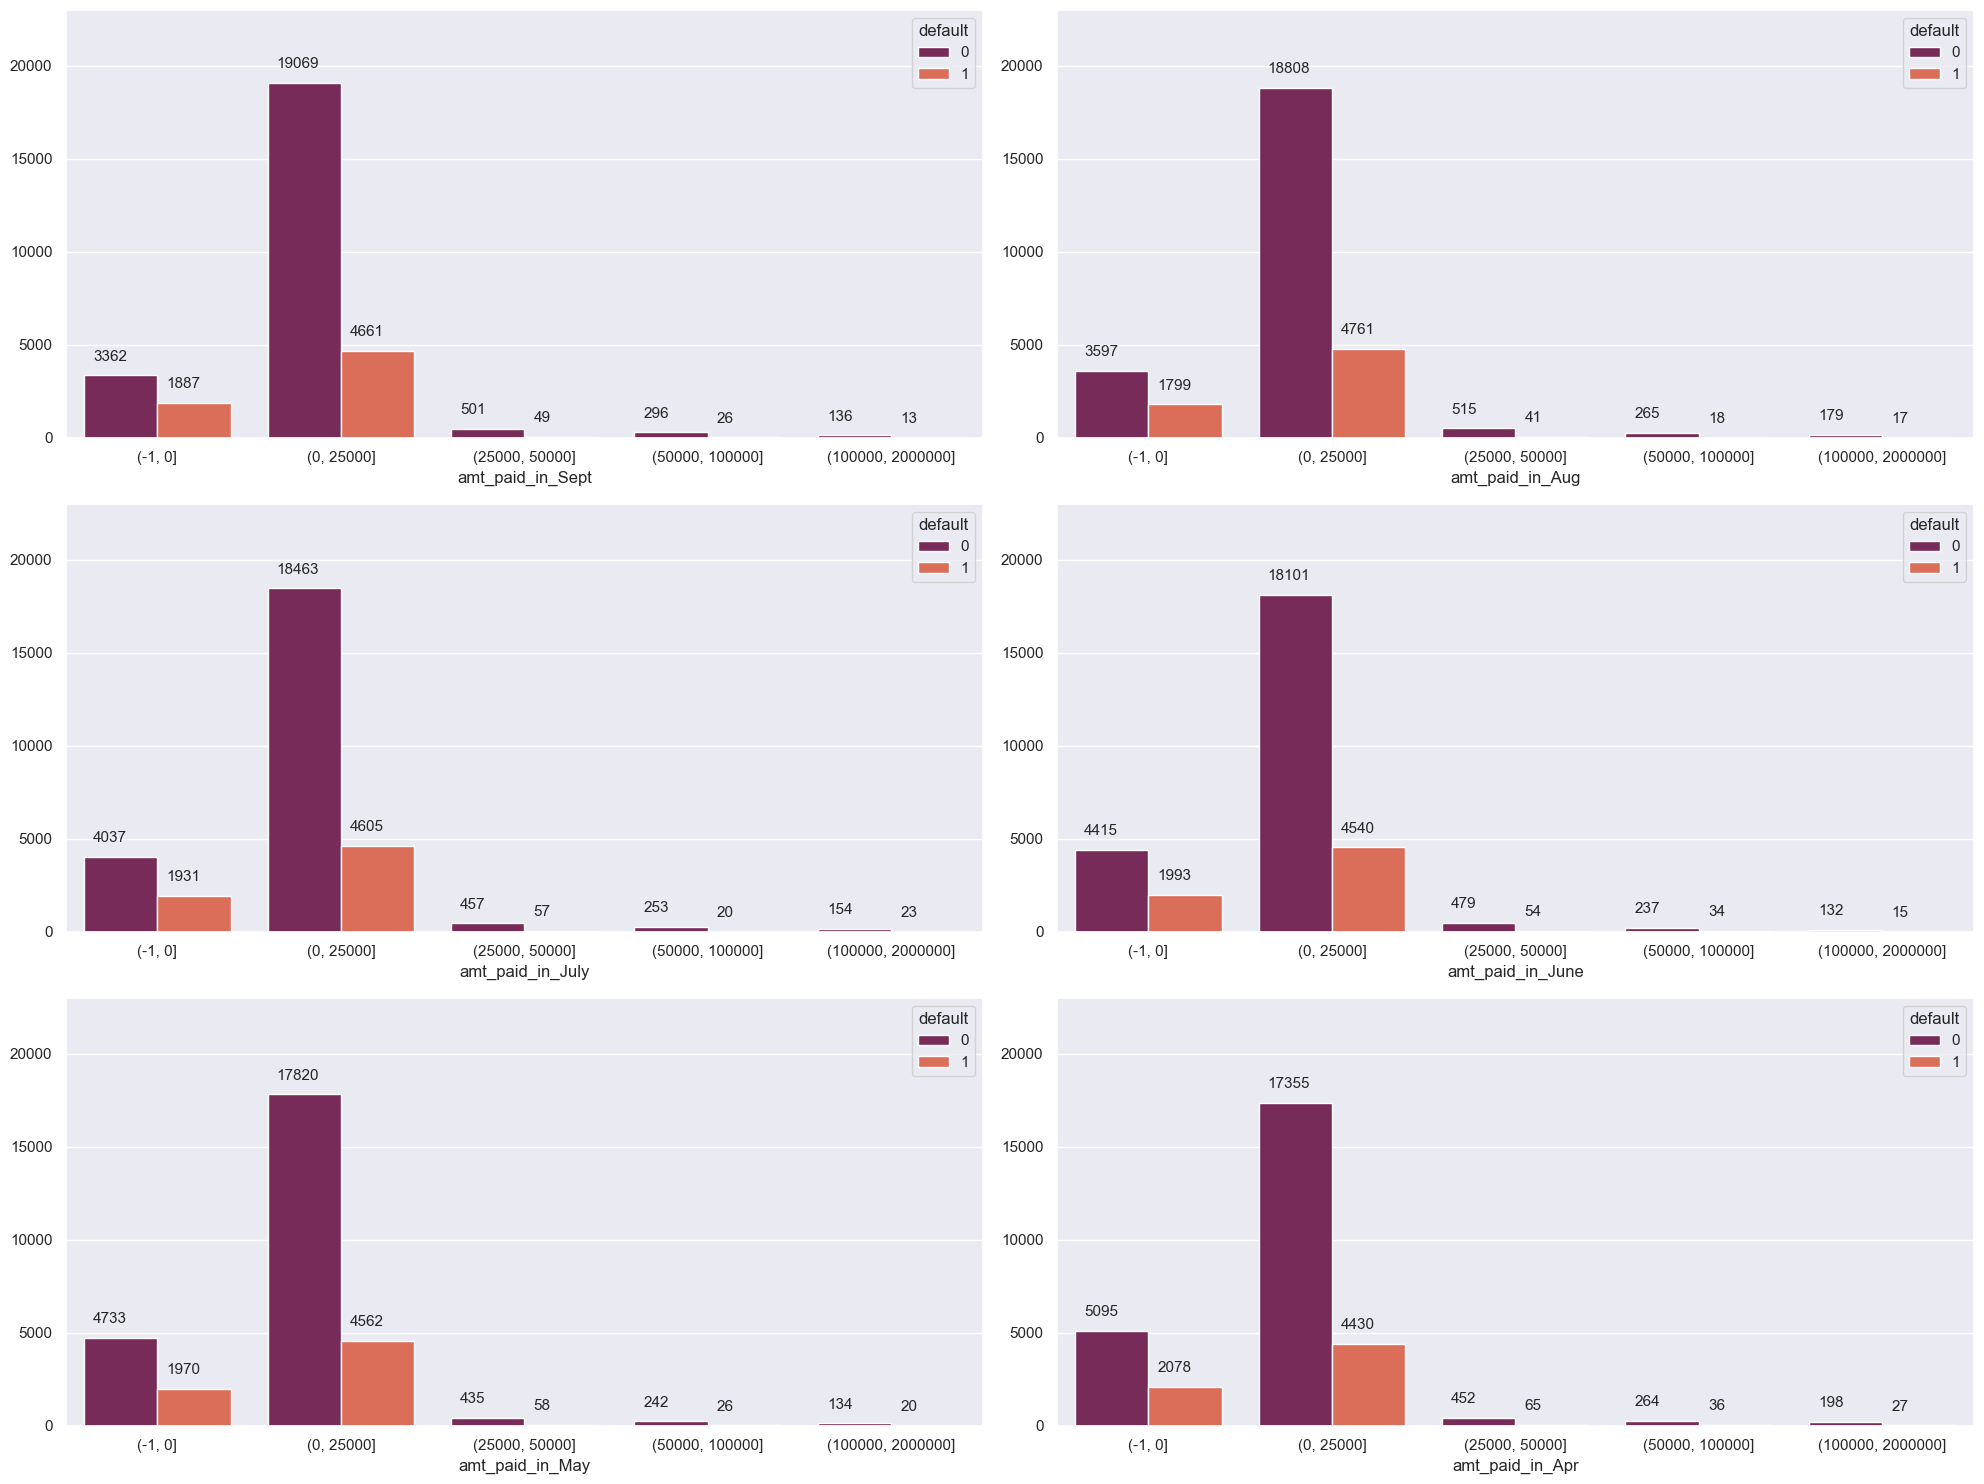

In [55]:
for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

In [56]:
#  lower default rates among those paid over 25k of NT dollars.

## Bill amount in month

In [57]:
bill_amtx_fts = ['bill_amt_in_Sept', 'bill_amt_in_Aug', 'bill_amt_in_July', 'bill_amt_in_June', 'bill_amt_in_May', 'bill_amt_in_Apr']
for i, col in enumerate (bill_amtx_fts):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])

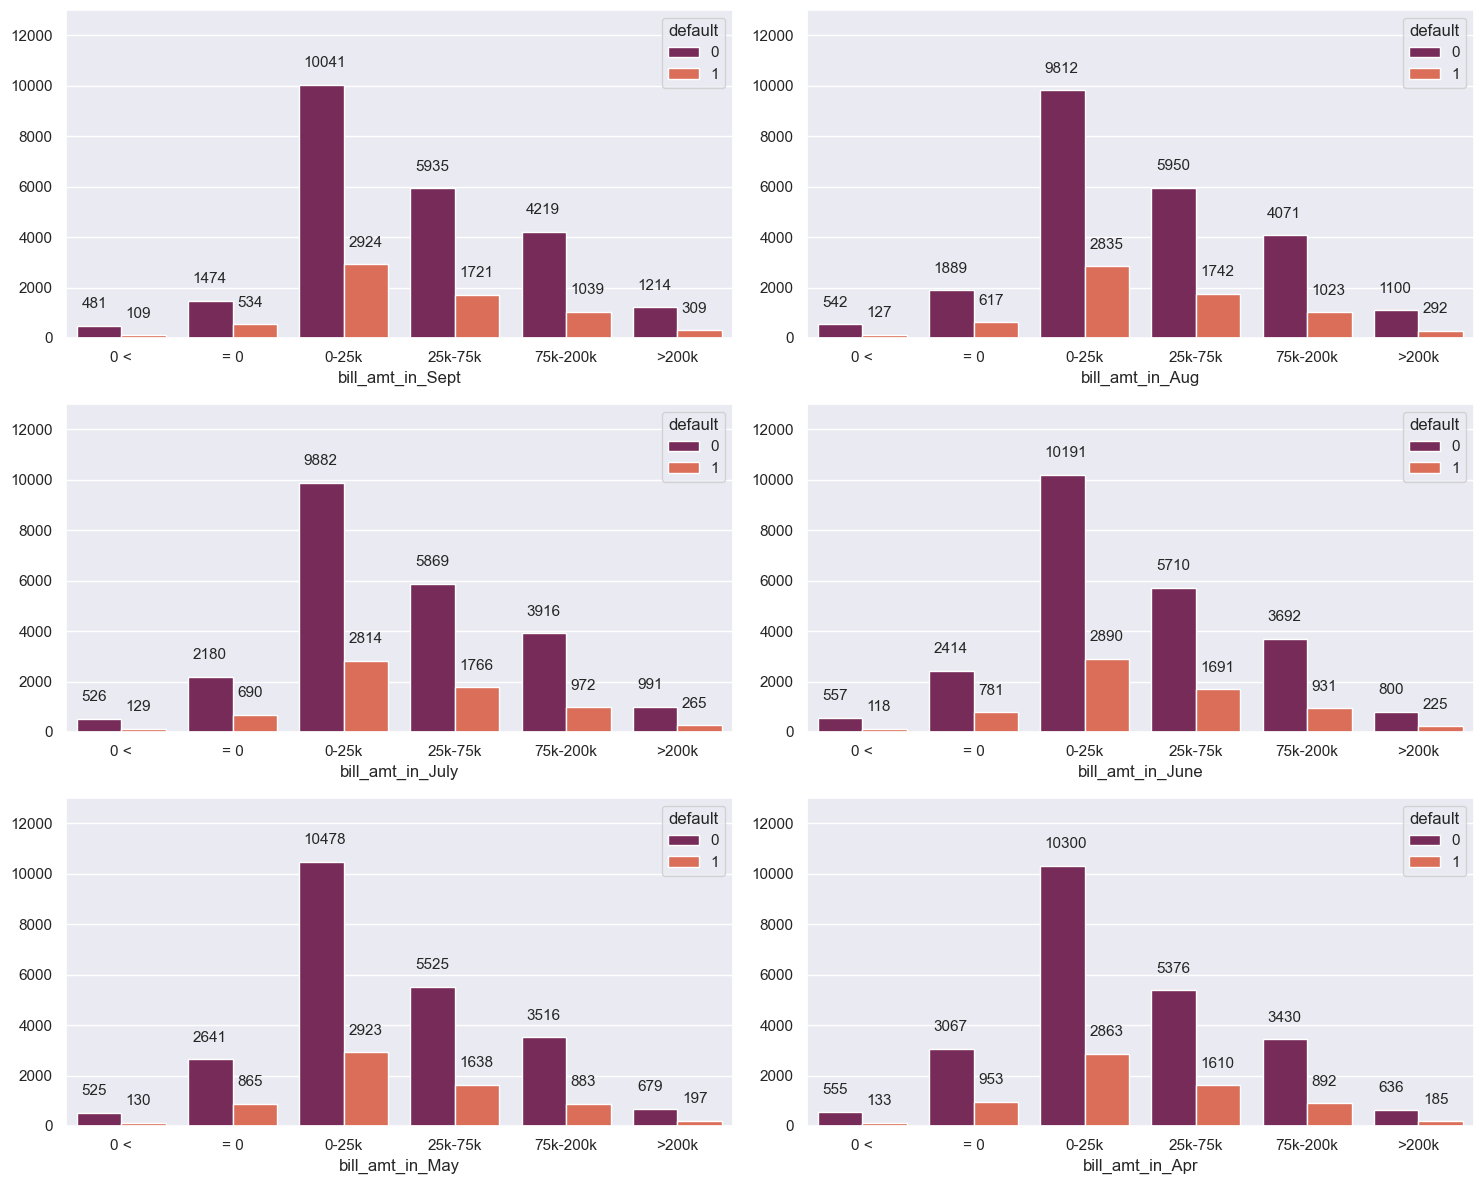

In [58]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

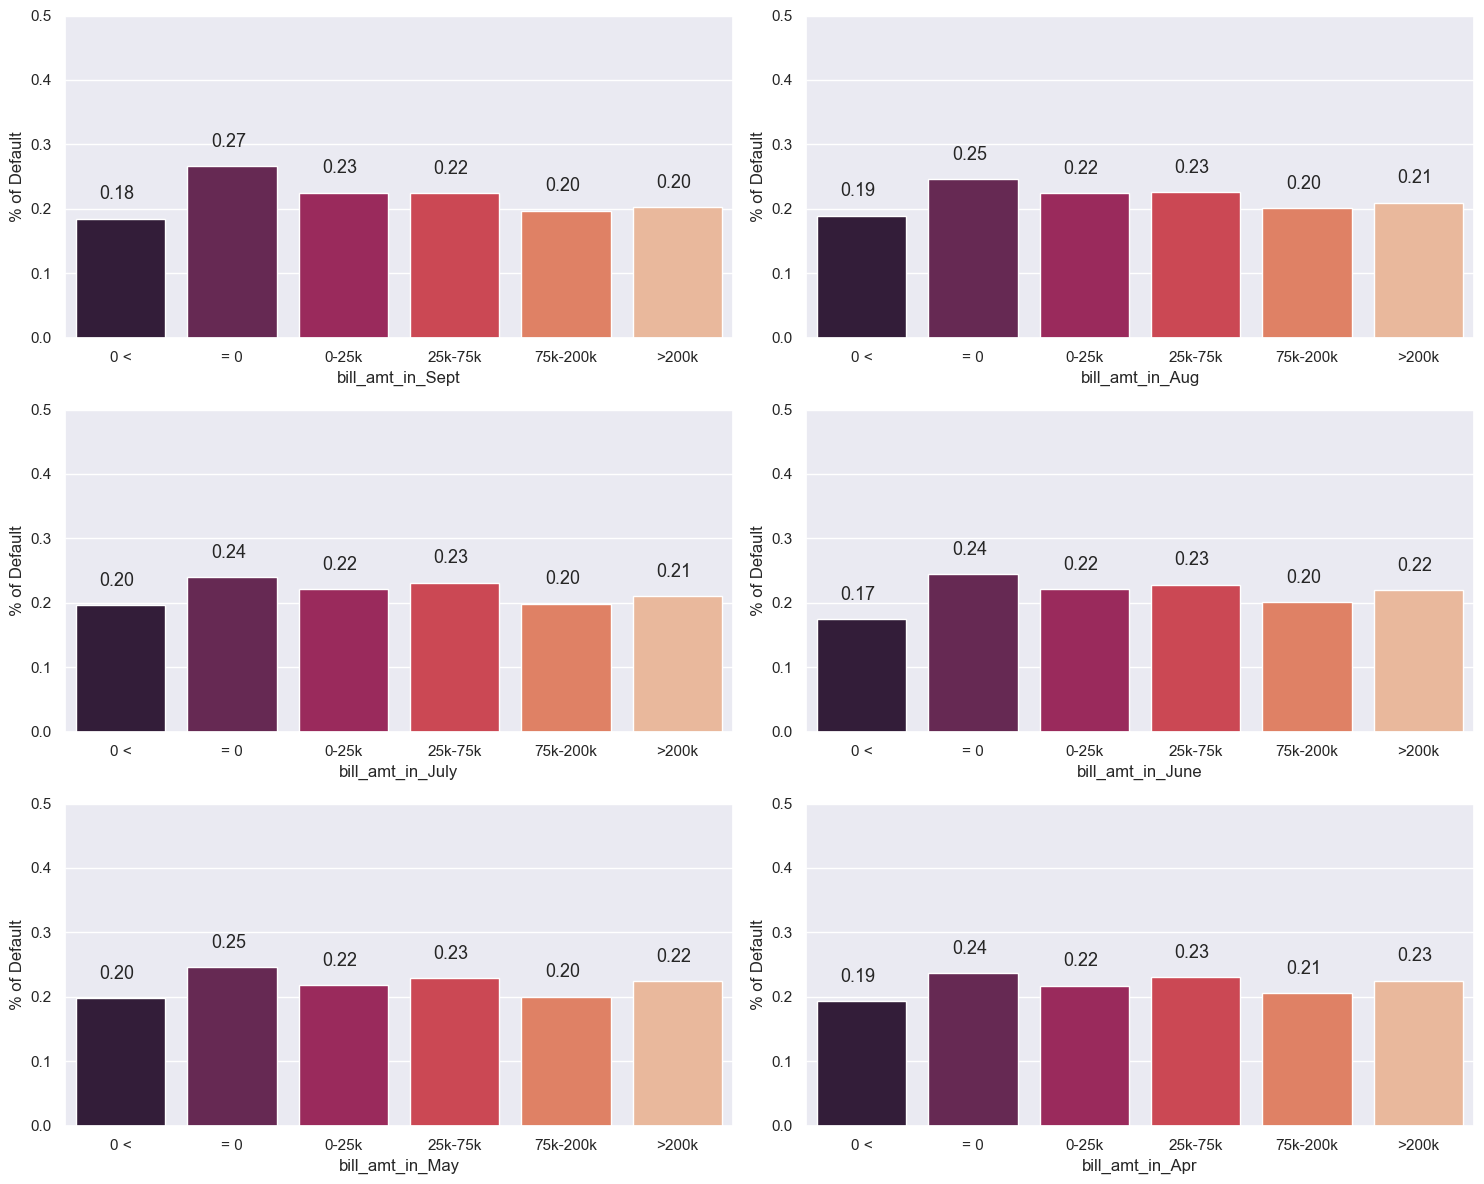

In [59]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

## Repayment of month

In [60]:
df['Repayment_of_Sept'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_of_Sept, dtype: int64

In [61]:
repay_amtx_bins = ['Repayment_of_Sept', 'Repayment_of_Aug', 'Repayment_of_July', 'Repayment_of_June', 'Repayment_of_May', 'Repayment_of_Apr']

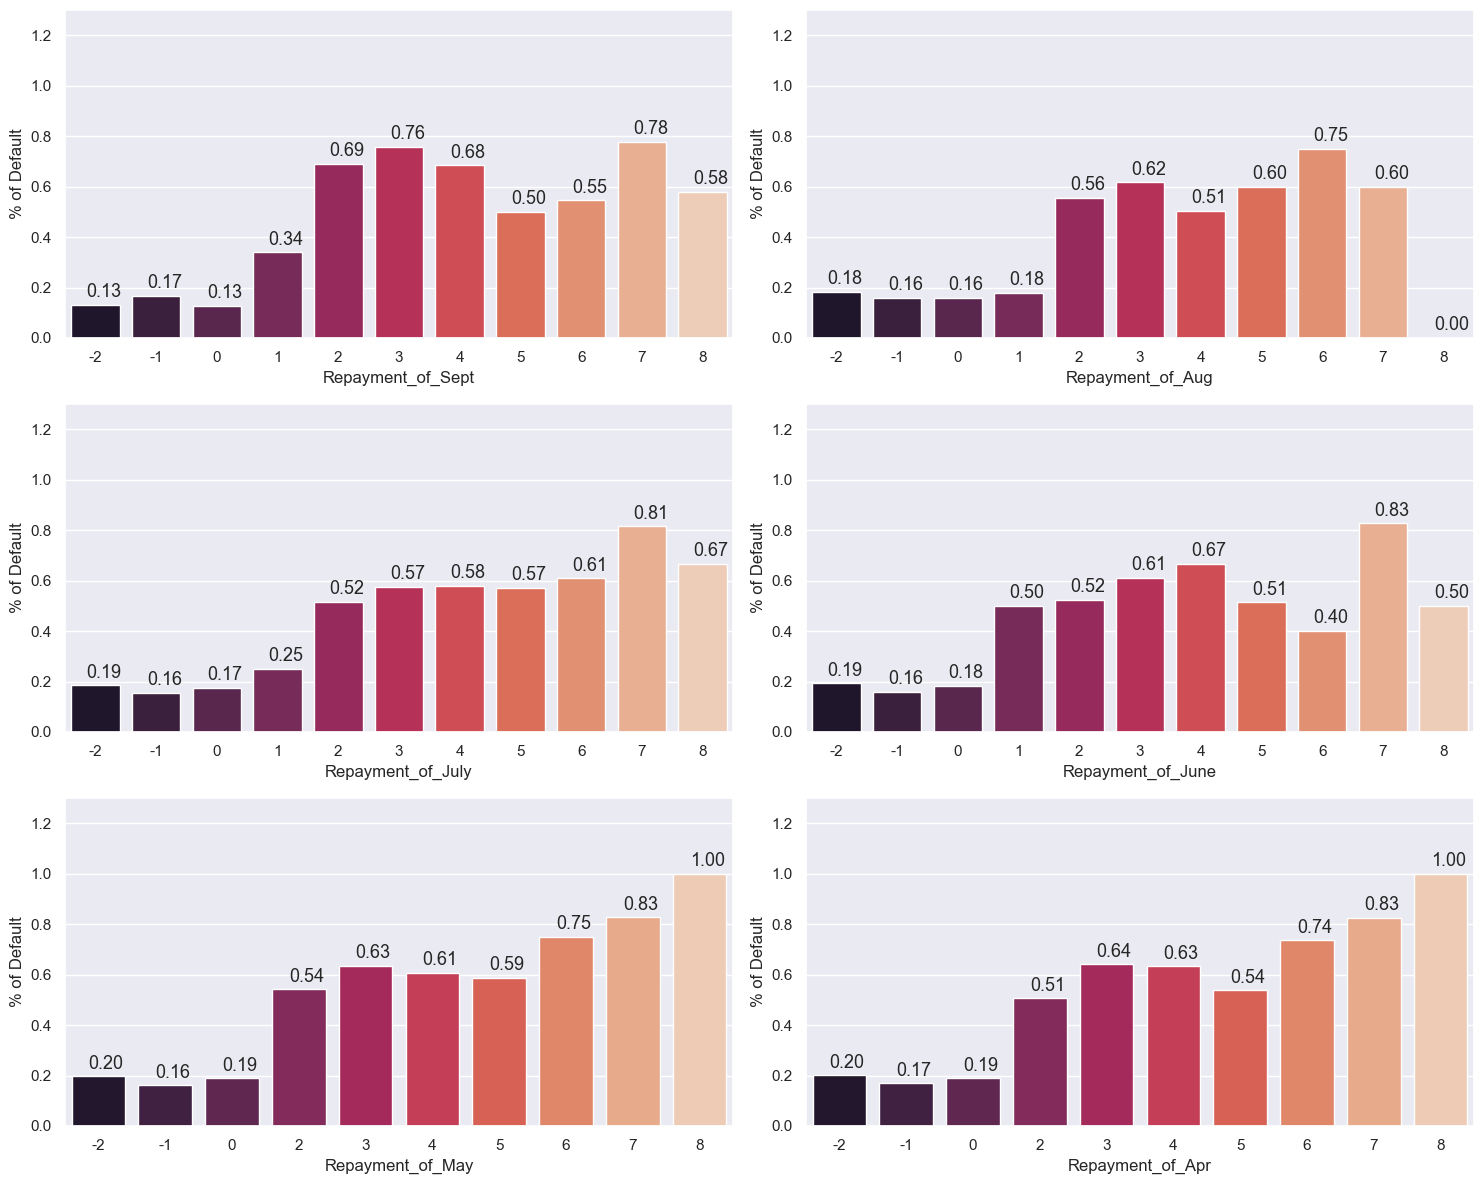

In [62]:
plt.figure(figsize=(15,12))
for i,col in enumerate(repay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.3)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [63]:
# There is a higher default rate among those whose payment delay more than six months

In [64]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,bill_amt_in_Sept,bill_amt_in_Aug,bill_amt_in_July,bill_amt_in_June,bill_amt_in_May,bill_amt_in_Apr,amt_paid_in_Sept,amt_paid_in_Aug,amt_paid_in_July,amt_paid_in_June,amt_paid_in_May,amt_paid_in_Apr,default,LIMIT_BAL_GROUP
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]",1,"(5000, 50000]"
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]",1,"(100000, 150000]"
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,"(0, 25000]","(0, 25000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"


In [65]:
df[['SEX']].value_counts()

SEX   
FEMALE    18112
MALE      11888
dtype: int64

In [66]:
df_final = pd.get_dummies(df,drop_first=True)

In [67]:
df_final.shape

(30000, 77)

In [68]:
df_final[['default']].value_counts()

default
0          23364
1           6636
dtype: int64

In [70]:
df_final.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'Repayment_of_Sept', 'Repayment_of_Aug',
       'Repayment_of_July', 'Repayment_of_June', 'Repayment_of_May',
       'Repayment_of_Apr', 'default', 'SEX_MALE', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_others',
       'MARRIAGE_single', 'bill_amt_in_Sept_(-1, 0]',
       'bill_amt_in_Sept_(0, 25000]', 'bill_amt_in_Sept_(25000, 75000]',
       'bill_amt_in_Sept_(75000, 200000]',
       'bill_amt_in_Sept_(200000, 2000000]', 'bill_amt_in_Aug_(-1, 0]',
       'bill_amt_in_Aug_(0, 25000]', 'bill_amt_in_Aug_(25000, 75000]',
       'bill_amt_in_Aug_(75000, 200000]', 'bill_amt_in_Aug_(200000, 2000000]',
       'bill_amt_in_July_(-1, 0]', 'bill_amt_in_July_(0, 25000]',
       'bill_amt_in_July_(25000, 75000]', 'bill_amt_in_July_(75000, 200000]',
       'bill_amt_in_July_(200000, 2000000]', 'bill_amt_in_June_(-1, 0]',
       'bill_amt_in_June_(0, 25000]', 'bill_amt_in_June_(25000, 75000]',
       'bill_amt_in_June_(7500

In [71]:
df_final.iloc[:,:]

,ID,LIMIT_BAL,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,default,SEX_MALE,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single,"bill_amt_in_Sept_(-1, 0]","bill_amt_in_Sept_(0, 25000]","bill_amt_in_Sept_(25000, 75000]","bill_amt_in_Sept_(75000, 200000]","bill_amt_in_Sept_(200000, 2000000]","bill_amt_in_Aug_(-1, 0]","bill_amt_in_Aug_(0, 25000]","bill_amt_in_Aug_(25000, 75000]","bill_amt_in_Aug_(75000, 200000]","bill_amt_in_Aug_(200000, 2000000]","bill_amt_in_July_(-1, 0]","bill_amt_in_July_(0, 25000]","bill_amt_in_July_(25000, 75000]","bill_amt_in_July_(75000, 200000]","bill_amt_in_July_(200000, 2000000]","bill_amt_in_June_(-1, 0]","bill_amt_in_June_(0, 25000]","bill_amt_in_June_(25000, 75000]","bill_amt_in_June_(75000, 200000]","bill_amt_in_June_(200000, 2000000]","bill_amt_in_May_(-1, 0]","bill_amt_in_May_(0, 25000]","bill_amt_in_May_(25000, 75000]","bill_amt_in_May_(75000, 200000]","bill_amt_in_May_(200000, 2000000]","bill_amt_in_Apr_(-1, 0]","bill_amt_in_Apr_(0, 25000]","bill_amt_in_Apr_(25000, 75000]","bill_amt_in_Apr_(75000, 200000]","bill_amt_in_Apr_(200000, 2000000]","amt_paid_in_Sept_(0, 25000]","amt_paid_in_Sept_(25000, 50000]","amt_paid_in_Sept_(50000, 100000]","amt_paid_in_Sept_(100000, 2000000]","amt_paid_in_Aug_(0, 25000]","amt_paid_in_Aug_(25000, 50000]","amt_paid_in_Aug_(50000, 100000]","amt_paid_in_Aug_(100000, 2000000]","amt_paid_in_July_(0, 25000]","amt_paid_in_July_(25000, 50000]","amt_paid_in_July_(50000, 100000]","amt_paid_in_July_(100000, 2000000]","amt_paid_in_June_(0, 25000]","amt_paid_in_June_(25000, 50000]","amt_paid_in_June_(50000, 100000]","amt_paid_in_June_(100000, 2000000]","amt_paid_in_May_(0, 25000]","amt_paid_in_May_(25000, 50000]","amt_paid_in_May_(50000, 100000]","amt_paid_in_May_(100000, 2000000]","amt_paid_in_Apr_(0, 25000]","amt_paid_in_Apr_(25000, 50000]","amt_paid_in_Apr_(50000, 100000]","amt_paid_in_Apr_(100000, 2000000]","LIMIT_BAL_GROUP_(50000, 100000]","LIMIT_BAL_GROUP_(100000, 150000]","LIMIT_BAL_GROUP_(150000, 200000]","LIMIT_BAL_GROUP_(200000, 300000]","LIMIT_BAL_GROUP_(300000, 400000]","LIMIT_BAL_GROUP_(400000, 500000]","LIMIT_BAL_GROUP_(500000, 1100000]"
0,1,20000,24,2,2,-1,-1,-2,-2,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,90000,34,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,4,50000,37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,5,50000,57,-1,0,-1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
29997,29998,30000,37,4,3,2,-1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29998,29999,80000,41,1,-1,0,0,0,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,

In [72]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_of_Sept,Repayment_of_Aug,Repayment_of_July,Repayment_of_June,Repayment_of_May,Repayment_of_Apr,bill_amt_in_Sept,bill_amt_in_Aug,bill_amt_in_July,bill_amt_in_June,bill_amt_in_May,bill_amt_in_Apr,amt_paid_in_Sept,amt_paid_in_Aug,amt_paid_in_July,amt_paid_in_June,amt_paid_in_May,amt_paid_in_Apr,default,LIMIT_BAL_GROUP
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,"(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]",1,"(5000, 50000]"
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]",1,"(100000, 150000]"
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,"(0, 25000]","(0, 25000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]",0,"(50000, 100000]"


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 30000 non-null  int64   
 1   LIMIT_BAL          30000 non-null  int64   
 2   SEX                30000 non-null  object  
 3   EDUCATION          30000 non-null  object  
 4   MARRIAGE           30000 non-null  object  
 5   AGE                30000 non-null  int64   
 6   Repayment_of_Sept  30000 non-null  int64   
 7   Repayment_of_Aug   30000 non-null  int64   
 8   Repayment_of_July  30000 non-null  int64   
 9   Repayment_of_June  30000 non-null  int64   
 10  Repayment_of_May   30000 non-null  int64   
 11  Repayment_of_Apr   30000 non-null  int64   
 12  bill_amt_in_Sept   30000 non-null  category
 13  bill_amt_in_Aug    30000 non-null  category
 14  bill_amt_in_July   30000 non-null  category
 15  bill_amt_in_June   30000 non-null  category
 16  bill

In [74]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [75]:
df_final = pd.read_excel('default of credit card clients.xls', header = 1)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(df_final.iloc[:,:], df_final['default payment next month'])
balance_df = pd.DataFrame(x_smote, columns=df_final.columns)

In [76]:
balance_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [77]:
balance_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

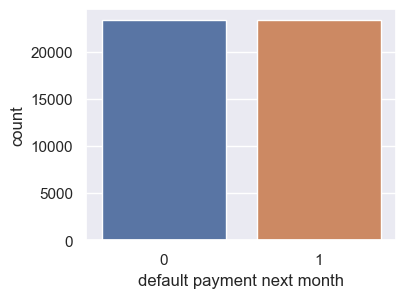

In [78]:
sns.set(rc={'figure.figsize':(4,3)})
sns.countplot('default payment next month', data = balance_df)

In [79]:
balance_df['default payment next month'].value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

In [80]:
balance_df
balance_df.to_csv('balance_df.csv',index=False)